<a href="https://colab.research.google.com/github/Caroline-Camargo/TrabalhosFerramentasDeInteligenciaArtificial/blob/main/Tarefa4_Regress%C3%A3o_Caroline_Souza_Camargo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importações básicas

In [ ]:
import pandas as pd
import numpy as np

#Regressão

Na tarefa dessa semana, iremos explorar aplicações de modelos de regressão. Diferente de modelos de classificação, onde desejamos descobrir a qual classe pertence uma amostra com base nos outros dados fornecidos, os modelos de regressão nos retornam um valor numérico.

Realize a aplicação das técnicas apresentadas a seguir e, por fim, escreva uma breve conclusão comparando os resultados obtidos entre os modelos utilizando as diferentes métricas de avaliação.


Materiais de apoio:

*   https://ricardomatsumura.medium.com/aprendizado-supervisionado-regress%C3%A3o-363547528ce5
*   https://www.geeksforgeeks.org/regression-in-machine-learning/

## Baixar dataset

O conjunto utilizado nesta tarefa está disponível no seguinte link:

https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

Pesquise como utilizar um conjunto de dados tabular disponibilizado no github. É uma tarefa bem simples, então você não deverá ter problemas.

Além disso, verifique a qualidade do dataset e veja se é necessário realizar alguma forma de tratamento de dados.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
X = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
y = ['charges']
X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.30)

In [ ]:
X_train.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [ ]:
if X_train.duplicated().sum() > 0:
  X_train = X_train.drop_duplicates()
  y_train = y_train.loc[X_train.index]
X_train.duplicated().sum()

0

In [ ]:
constant_columns = [col for col in X_train.columns if X_train[col].nunique() == 1]
constant_columns

[]

In [ ]:
X_train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehot_encoder = OneHotEncoder(drop='first')
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', onehot_encoder, ['sex', 'smoker', 'region'])
    ], remainder='passthrough'
)

X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
dtype: object

In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7
0,1.0,0.0,0.0,1.0,0.0,28.0,38.060,0.0
1,0.0,0.0,0.0,1.0,0.0,32.0,23.650,1.0
2,1.0,0.0,1.0,0.0,0.0,55.0,27.645,0.0
3,1.0,1.0,1.0,0.0,0.0,34.0,27.835,1.0
4,1.0,1.0,0.0,0.0,0.0,36.0,41.895,3.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head()

,0,1,2,3,4,5,6,7
0,1.0,0.0,0.0,1.0,0.0,0.217391,0.603495,0.0
1,0.0,0.0,0.0,1.0,0.0,0.304348,0.209995,0.2
2,1.0,0.0,1.0,0.0,0.0,0.804348,0.319088,0.0
3,1.0,1.0,1.0,0.0,0.0,0.347826,0.324276,0.2
4,1.0,1.0,0.0,0.0,0.0,0.391304,0.708220,0.6


In [ ]:
print(X_train.info())
print(y_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       934 non-null    float64
 1   1       934 non-null    float64
 2   2       934 non-null    float64
 3   3       934 non-null    float64
 4   4       934 non-null    float64
 5   5       934 non-null    float64
 6   6       934 non-null    float64
 7   7       934 non-null    float64
dtypes: float64(8)
memory usage: 58.5 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 934 entries, 226 to 276
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   charges  934 non-null    float64
dtypes: float64(1)
memory usage: 14.6 KB
None


In [ ]:
print(X_test.info())
print(y_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       402 non-null    float64
 1   1       402 non-null    float64
 2   2       402 non-null    float64
 3   3       402 non-null    float64
 4   4       402 non-null    float64
 5   5       402 non-null    float64
 6   6       402 non-null    float64
 7   7       402 non-null    float64
dtypes: float64(8)
memory usage: 25.2 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 402 entries, 1171 to 1221
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   charges  402 non-null    float64
dtypes: float64(1)
memory usage: 6.3 KB
None


##Regressão Linear

Materiais de apoio:

*   https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares



In [ ]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred_linearRegression = reg.predict(X_test)
y_pred_linearRegression = pd.DataFrame(y_pred_linearRegression)


##SVR - Support Vector Regression

Materiais de apoio:


*   https://scikit-learn.org/stable/modules/svm.html#regression


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

regr = SVR()
grid_search = GridSearchCV(estimator=regr, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_regr = grid_search.best_estimator_

y_pred_SVR = best_regr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

## MLP (sklearn)

Materiais de apoio:


*   https://scikit-learn.org/stable/modules/neural_networks_supervised.html#regression



In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 500]
}

regr = MLPRegressor(random_state=1)
grid_search = GridSearchCV(estimator=regr, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_regr = grid_search.best_estimator_

y_pred_MLP = best_regr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conver

#Métricas de Avaliação

Devido à natureza distinta dos problemas e dos resultados obtidos em tarefas de classificação e regressão, as métricas utilizadas para avaliar a performance nesses dois tipos de tarefas são diferentes. Em tarefas de regressão, a saída do modelo é um valor contínuo, e as métricas ajudam a entender o quão próximas as previsões estão dos valores verdadeiros, além de identificar a magnitude dos erros de previsão.

Materiais de apoio:

*   https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

*   https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/

*   https://developer.nvidia.com/blog/a-comprehensive-overview-of-regression-evaluation-metrics/

O link fornecido no inicio dessa tarefa, do professor Ricardo Araujo, também possui informações uteis sobre as métricas de avaliação.

### Avaliação visual

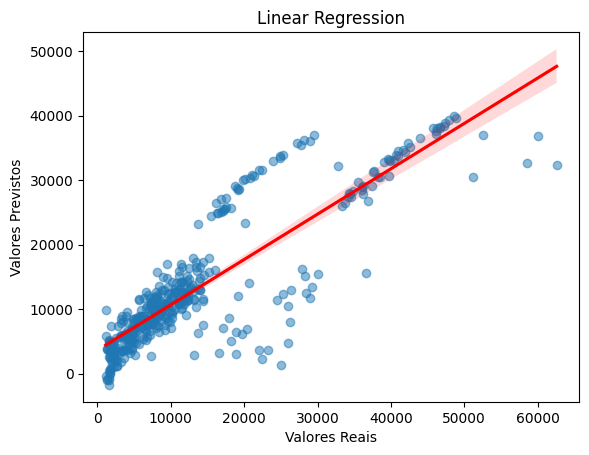

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(y_test, y_pred_linearRegression, alpha=0.5)
plt.title('Linear Regression')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
sns.regplot(x=y_test.values, y=y_pred_linearRegression.values, scatter=False, color='red')
plt.show()

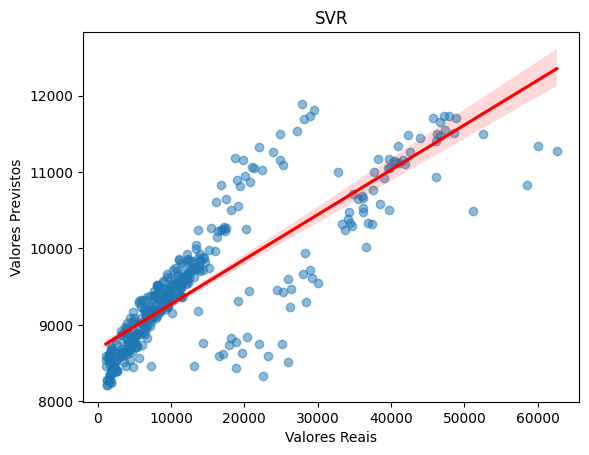

In [ ]:
plt.scatter(y_test, y_pred_SVR, alpha=0.5)
plt.title('SVR')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
sns.regplot(x=y_test.values, y=y_pred_SVR, scatter=False, color='red')
plt.show()

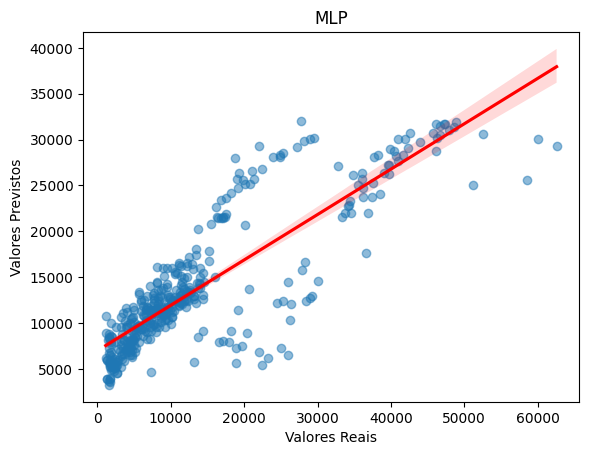

In [ ]:
plt.scatter(y_test, y_pred_MLP, alpha=0.5)
plt.title('MLP')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
sns.regplot(x=y_test.values, y=y_pred_MLP, scatter=False, color='red')
plt.show()

###R2_Score

In [ ]:
from sklearn.metrics import r2_score

print(f'R2 Score')
print(f'linearRegression: {r2_score(y_test, y_pred_linearRegression)}')
print(f'SVR: {r2_score(y_test, y_pred_SVR)}')
print(f'MLP: {r2_score(y_test, y_pred_MLP)}')

R2 Score
linearRegression: 0.7434199756119706
SVR: 0.004882769246980945
MLP: 0.6517151151258684


### Erro absoluto médio

In [ ]:
from sklearn.metrics import mean_absolute_error

print(f'Mean Absolute Error')
print(f'linearRegression: {mean_absolute_error(y_test, y_pred_linearRegression)}')
print(f'SVR: {mean_absolute_error(y_test, y_pred_SVR)}')
print(f'MLP: {mean_absolute_error(y_test, y_pred_MLP)}')

Mean Absolute Error
linearRegression: 4362.622126566624
SVR: 8023.457457746253
MLP: 5563.169636367301


### Erro quadrático médio

In [ ]:
from sklearn.metrics import mean_squared_error

print(f'Mean Squared Error')
print(f'linearRegression: {mean_squared_error(y_test, y_pred_linearRegression)}')
print(f'SVR: {mean_squared_error(y_test, y_pred_SVR)}')
print(f'MLP: {mean_squared_error(y_test, y_pred_MLP)}')

Mean Squared Error
linearRegression: 40907780.42412491
SVR: 158656299.4099043
MLP: 55528724.92492175


### Erro máximo

In [ ]:
from sklearn.metrics import max_error

print(f'Max Error')
print(f'linearRegression: {max_error(y_test, y_pred_linearRegression)}')
print(f'SVR: {max_error(y_test, y_pred_SVR)}')
print(f'MLP: {max_error(y_test, y_pred_MLP)}')

Max Error
linearRegression: 30259.25558124725
SVR: 51317.091752654866
MLP: 33305.314923932136


#Conclusão







Os resultados iniciais dos modelos SVR e MLP mostraram desempenho significativamente abaixo do esperado, o que pode ser atribuído à falta de ajuste dos hiperparâmetros (que em um primeiro momento não tinha realizado). A etapa inicial não otimizada resultou em métricas de avaliação, como R2 Score baixos para SVR e MLP, além de altos valores de erros médios (MAE, MSE e Max Error). Então realizei os ajustes nos hiperparâmetros, e ocorreu melhorias em ambos os modelos.

Mas mesmo assim o modelo de Regressão Linear apresentou o melhor desempenho geral entre os três modelos avaliados. O SVR teve um desempenho bastante inferior, enquanto o MLP ficou em uma posição intermediária, apresentando resultados razoáveis, mas não tão bons quanto a Regressão Linear

A Regressão Linear obteve um R2 Score de 0.7434, indicando um ajuste razoavelmente bom dos dados, juntamente com os menores valores de Mean Absolute Error (4362.62), Mean Squared Error (40907780.42) e Max Error (30259.26) entre os modelos. Por outro lado, o SVR apresentou resultados significativamente piores, com um R2 Score muito baixo (0.0049) e os maiores erros médios e máximos. O MLP não conseguiu rivalizar com a precisão da Regressão Linear